# Neurosynth

See if we get interesting results in neurosynth

In [7]:
%cd work/notebooks

[Errno 2] No such file or directory: 'work/notebooks'
/home/jovyan/work/notebooks


In [8]:
# Import modules and R
import numpy as np, pandas as pd
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [245]:
# Import local code
import sys
sys.path.append('../code')
from gradientVersion import *
from processing_helpers import *
from analysis_helpers import *
from mri_maps import *
from neurosynth_meta import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");
%R source("../code/plot_maps.R");

In [99]:
dm_hcp_3d_ds5 = gradientVersion().fit('hcp_3donors_ds5')
dm_hcp_ds8 = gradientVersion().fit('hcp_ds8')

New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5
New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=hcp_ds8


In [28]:
ns_dset = get_neurosynth_dset()
concepts = get_cogatlas_concepts()
matched_concepts = get_matching_terms(ns_dset, concepts)

Matched 124/884 terms in Neurosynth vocab (total 3228)


In [31]:
test = run_meta_one_term(matched_concepts[80], ns_dset)
parcellate_meta(test)

Running meta analysis for 'belief' (estimator = MKDADensity)


array([1.03268369e-01, 5.83992089e-01, 9.09195377e-02, 9.90787078e-02,
       9.61712396e-02, 2.31847822e-01, 5.81941065e-01, 2.71520866e-01,
       3.52904251e-01, 8.70398033e-01, 6.18631409e-01, 7.91552885e-01,
       3.96568808e-03, 1.72682752e-01, 9.37578844e-01, 3.89114647e-02,
       1.71388522e-01, 2.02857584e-01, 3.55047261e-01, 1.80051355e-03,
       2.74652663e-01, 3.04205385e-02, 3.95045188e-01, 8.61169671e-01,
       1.64312812e+00, 8.50545655e-01, 2.07544978e+00, 2.27763008e+00,
       2.36975277e+00, 4.03025252e+00, 1.99139242e-01, 5.05875649e-01,
       1.79415392e+00, 2.03292026e+00, 1.83425417e+00, 0.00000000e+00,
       2.00527754e-02, 1.75485074e-01, 0.00000000e+00, 1.88240118e-01,
       4.48696843e-01, 1.00023654e-01, 1.68586501e+00, 2.46272255e-01,
       2.92468574e-01, 1.38057531e-01, 1.21248454e+00, 1.43696235e+00,
       1.03124124e-01, 5.31800248e-01, 3.78594264e-01, 1.17633157e+00,
       8.65649814e-02, 3.46367305e-01, 5.97880455e-04, 5.59427614e-02,
      

In [213]:
all_labels = ns_dset.get_labels()
all_terms = [label.replace('terms_abstract_tfidf__', '') 
                        for label in all_labels]

In [215]:
ns_maps_all_raw = get_parcellated_terms(all_terms, ns_dset)
save_pickle(ns_maps_all_raw, 'ns_maps_all_raw')

Running meta analysis for '001' (estimator = MKDADensity)
Running meta analysis for '01' (estimator = MKDADensity)
Running meta analysis for '05' (estimator = MKDADensity)
Running meta analysis for '10' (estimator = MKDADensity)
Running meta analysis for '100' (estimator = MKDADensity)
Running meta analysis for '11' (estimator = MKDADensity)
Running meta analysis for '12' (estimator = MKDADensity)
Running meta analysis for '12 healthy' (estimator = MKDADensity)
Running meta analysis for '13' (estimator = MKDADensity)
Running meta analysis for '14' (estimator = MKDADensity)
Running meta analysis for '14 healthy' (estimator = MKDADensity)
Running meta analysis for '15' (estimator = MKDADensity)
Running meta analysis for '15 healthy' (estimator = MKDADensity)
Running meta analysis for '16' (estimator = MKDADensity)
Running meta analysis for '16 healthy' (estimator = MKDADensity)
Running meta analysis for '17' (estimator = MKDADensity)
Running meta analysis for '18' (estimator = MKDADensit

In [235]:
ns_maps = (ns_maps_all_raw
    .iloc[:180].set_axis(range(1,181))
    .join(get_labels_hcp()).set_index('label')
    .apply(lambda x: (x-np.mean(x))/np.std(x))
)

In [218]:
get_corrs(version.clean_scores(), ns_maps).describe()

G1           G2           G3
count  3228.000000  3228.000000  3228.000000
mean      0.019994     0.197270    -0.003052
std       0.165901     0.124680     0.114625
min      -0.536056    -0.316737    -0.333869
25%      -0.069316     0.131923    -0.075580
50%       0.042662     0.213088    -0.011041
75%       0.126204     0.277002     0.067403
max       0.534183     0.538097     0.394154

In [253]:
version = dm_hcp_3d_ds5
# version = dm_hcp_ds8
anatomical_terms = list_anatomical_terms()

ns_corrs = (get_corrs(version.clean_scores(), ns_maps)
    .melt(ignore_index=False).reset_index()
    .set_axis(['term','G','corr'], axis=1)
    .assign(corr_abs = lambda x: x['corr'].abs())
    .loc[lambda x: ~x['term'].str.contains('|'.join(anatomical_terms))]
    .assign(rank = lambda x: x.groupby('G')['corr_abs'].rank(ascending=False))
    .loc[lambda x: x['rank'] <= 20]
    .groupby('G', group_keys=False).apply(lambda x: x.sort_values('corr_abs', ascending=False))
    
)
ns_corrs.head()

term   G      corr  corr_abs  rank
2686       sighted  G1  0.534183  0.534183   1.0
3143        vision  G1  0.508865  0.508865   2.0
517    conditioned  G1 -0.503752  0.503752   3.0
518   conditioning  G1 -0.488403  0.488403   4.0
1136          fear  G1 -0.482445  0.482445   5.0

In [259]:
(get_corrs(version.clean_scores(), ns_maps)
    .melt(ignore_index=False).reset_index()
    .set_axis(['term','G','corr'], axis=1)
    .assign(corr_abs = lambda x: x['corr'].abs())
    .loc[lambda x: x['term'].str.contains('|'.join(disorder_terms))]
    .shape
)

(135, 4)

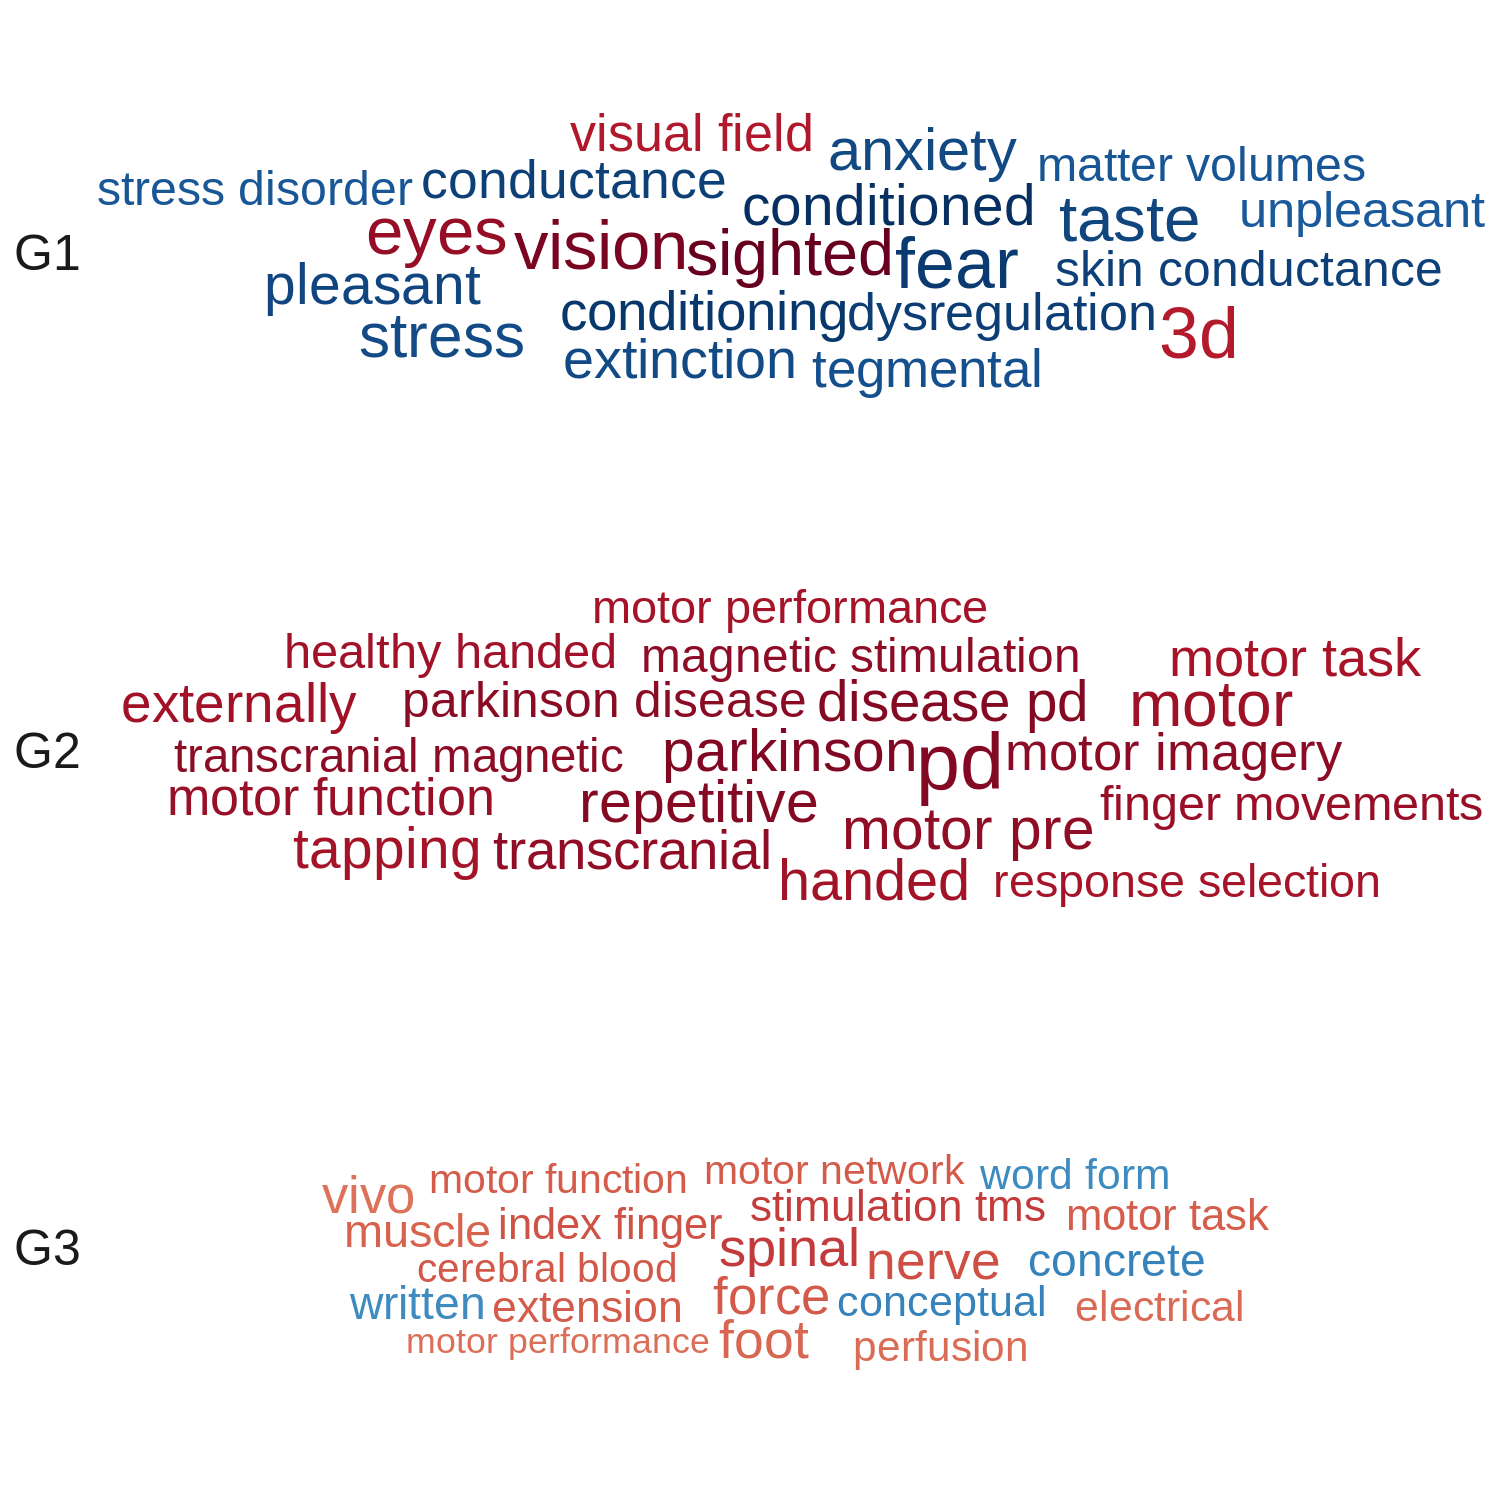

In [239]:
%%R -i ns_corrs -w 15 -h 15 --units in -r 100
ggplot(ns_corrs, aes(label=term, size=abs(corr), color=corr)) +
facet_grid(G~., switch='y') +
geom_text_wordcloud(area_corr=T) +
scale_size_area(max_size = 20) +
scale_color_gradientn(colors=rev(brewer.rdbu(100))) +
guides(color=guide_colorbar()) +
theme_minimal() +
theme(strip.text.y.left=element_text(size=36, angle=0))

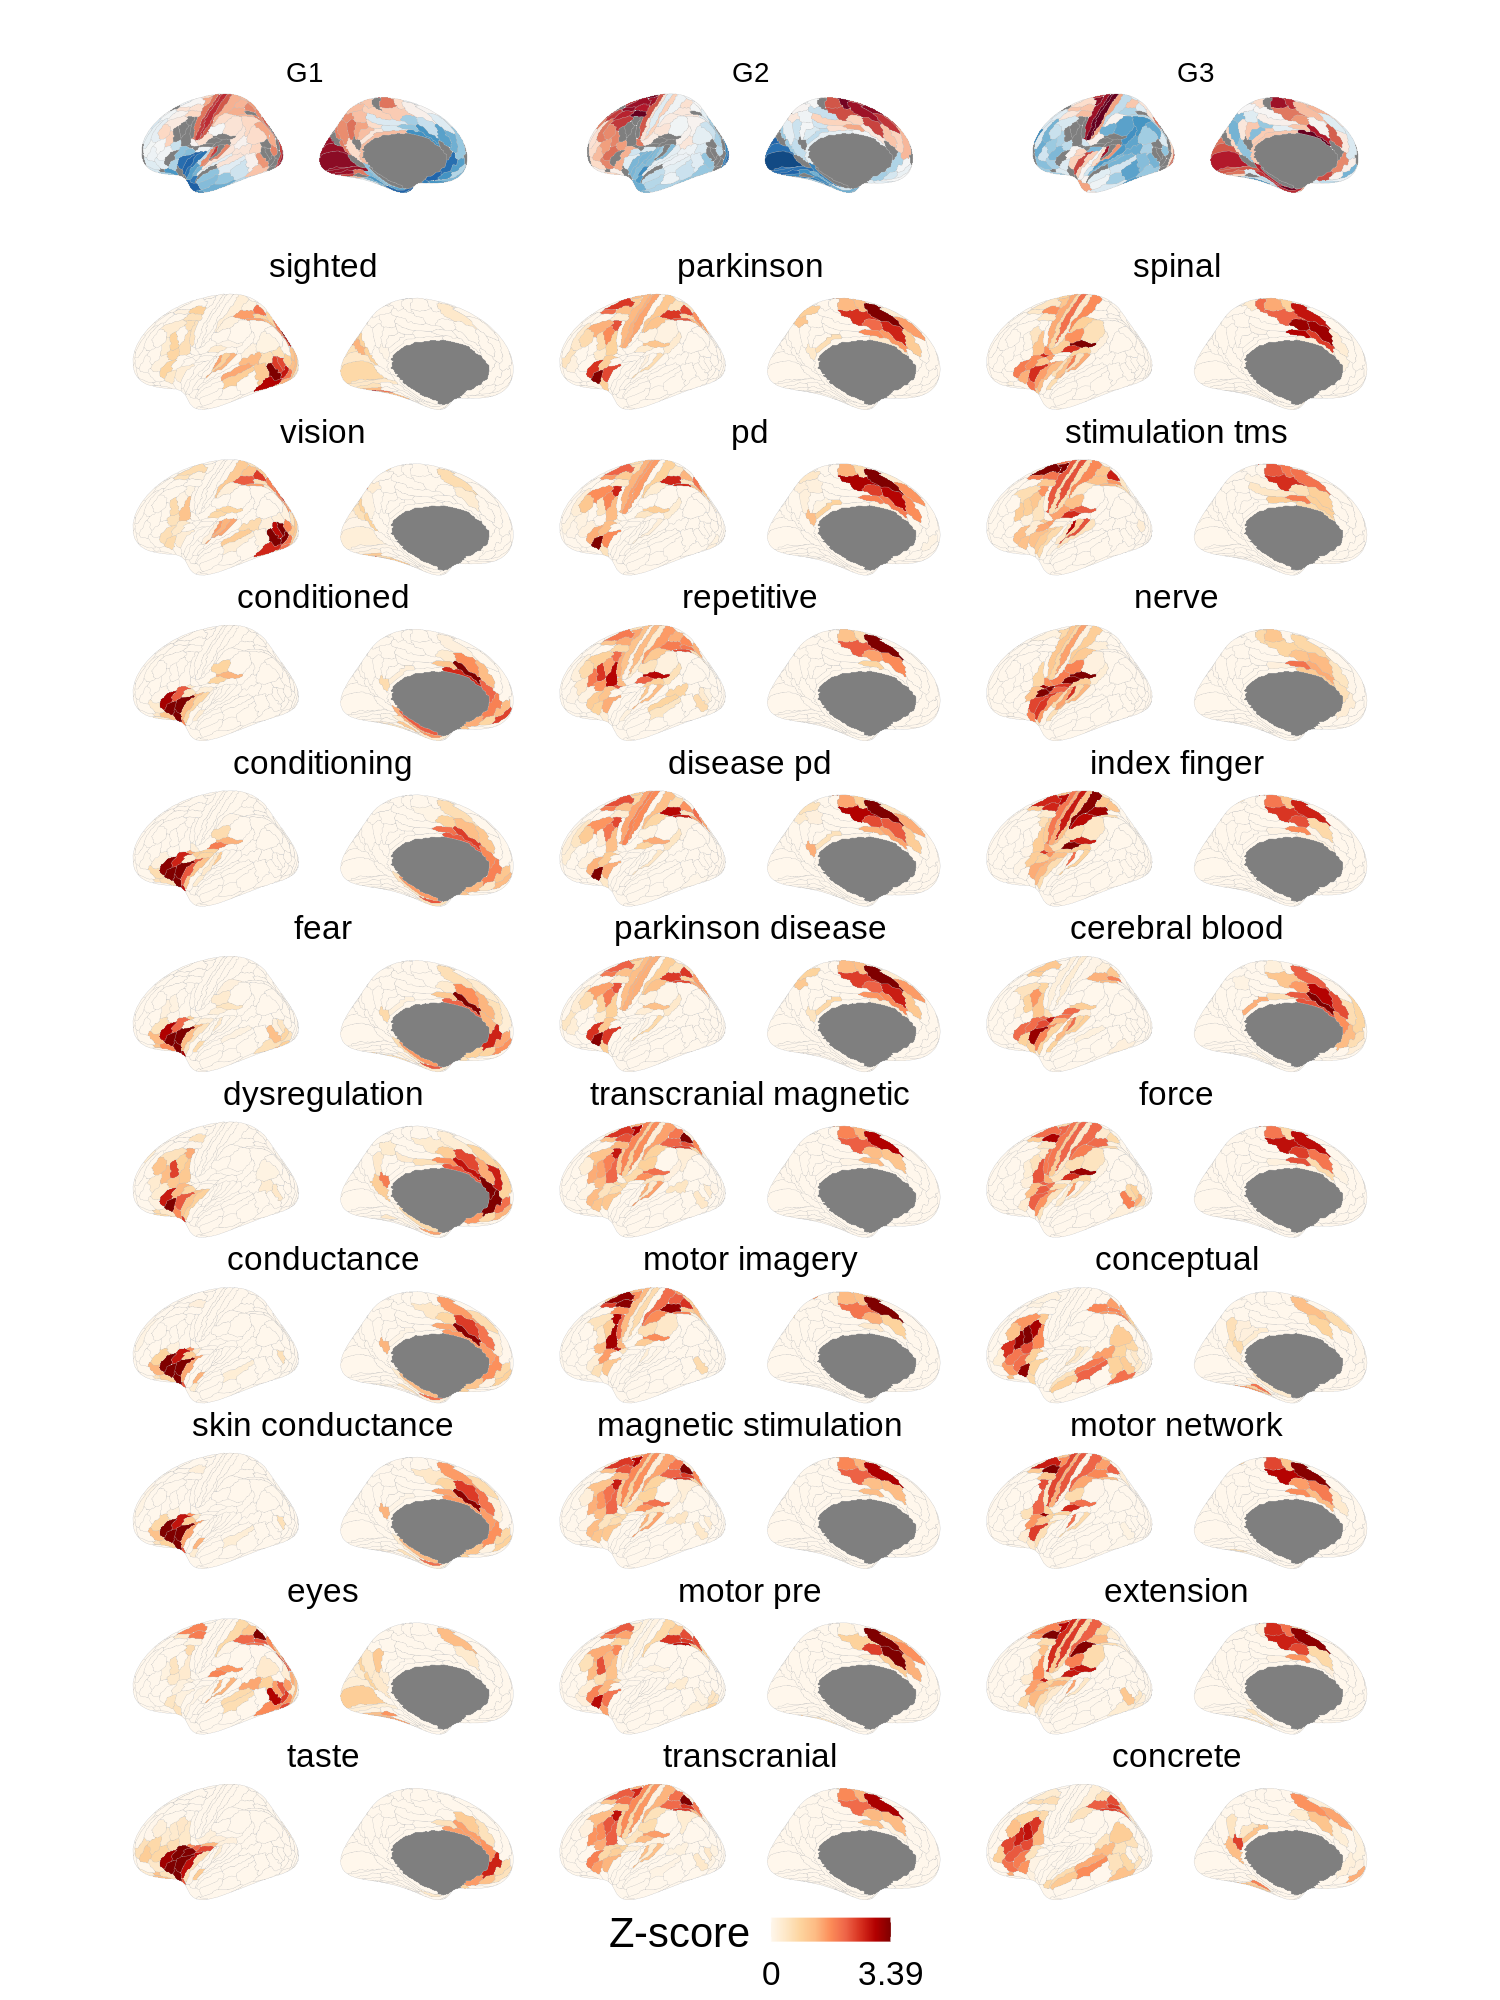

In [240]:
%%R -w 15 -h 20 --units in -r 100 -i ns_maps -i ns_corrs -i hcp_scores
source("../code/plot_maps.R")

selected_terms = list(
    G1 = ns_corrs %>% filter(G=='G1', rank <= 10) %>% .$term,
    G2 = ns_corrs %>% filter(G=='G2', rank <= 10) %>% .$term,
    G3 = ns_corrs %>% filter(G=='G3', rank <= 10) %>% .$term
)
selected_maps = cbind(
    ns_maps %>% select(all_of(selected_terms$G1)),
    ns_maps %>% select(all_of(selected_terms$G2)),
    ns_maps %>% select(all_of(selected_terms$G3))
)

((
(plot_hcp_wide(hcp_scores) + guides(fill=F)) / 
plot_maps(selected_maps, colorscale='zero', colors=brewer.orrd(100))    
) + plot_layout(heights=c(1,14))) & theme(text=element_text(size=30))

### Disorder terms

In [264]:
version = dm_hcp_3d_ds5
# version = dm_hcp_ds8
disorder_terms = list_disorder_terms()

ns_corrs = (get_corrs(version.clean_scores(), ns_maps)
    .melt(ignore_index=False).reset_index()
    .set_axis(['term','G','corr'], axis=1)
    .assign(corr_abs = lambda x: x['corr'].abs())
    .loc[lambda x: x['term'].str.contains('|'.join(disorder_terms))]
    .assign(rank = lambda x: x.groupby('G')['corr_abs'].rank(ascending=False))
    .loc[lambda x: x['rank'] <= 20]
    .groupby('G', group_keys=False).apply(lambda x: x.sort_values('corr_abs', ascending=False))
    
)
ns_corrs.head()

term   G      corr  corr_abs  rank
209             anxiety  G1 -0.455368  0.455368   1.0
2815             stress  G1 -0.451790  0.451790   2.0
2816    stress disorder  G1 -0.430393  0.430393   3.0
210   anxiety disorders  G1 -0.415920  0.415920   4.0
2349               ptsd  G1 -0.413683  0.413683   5.0

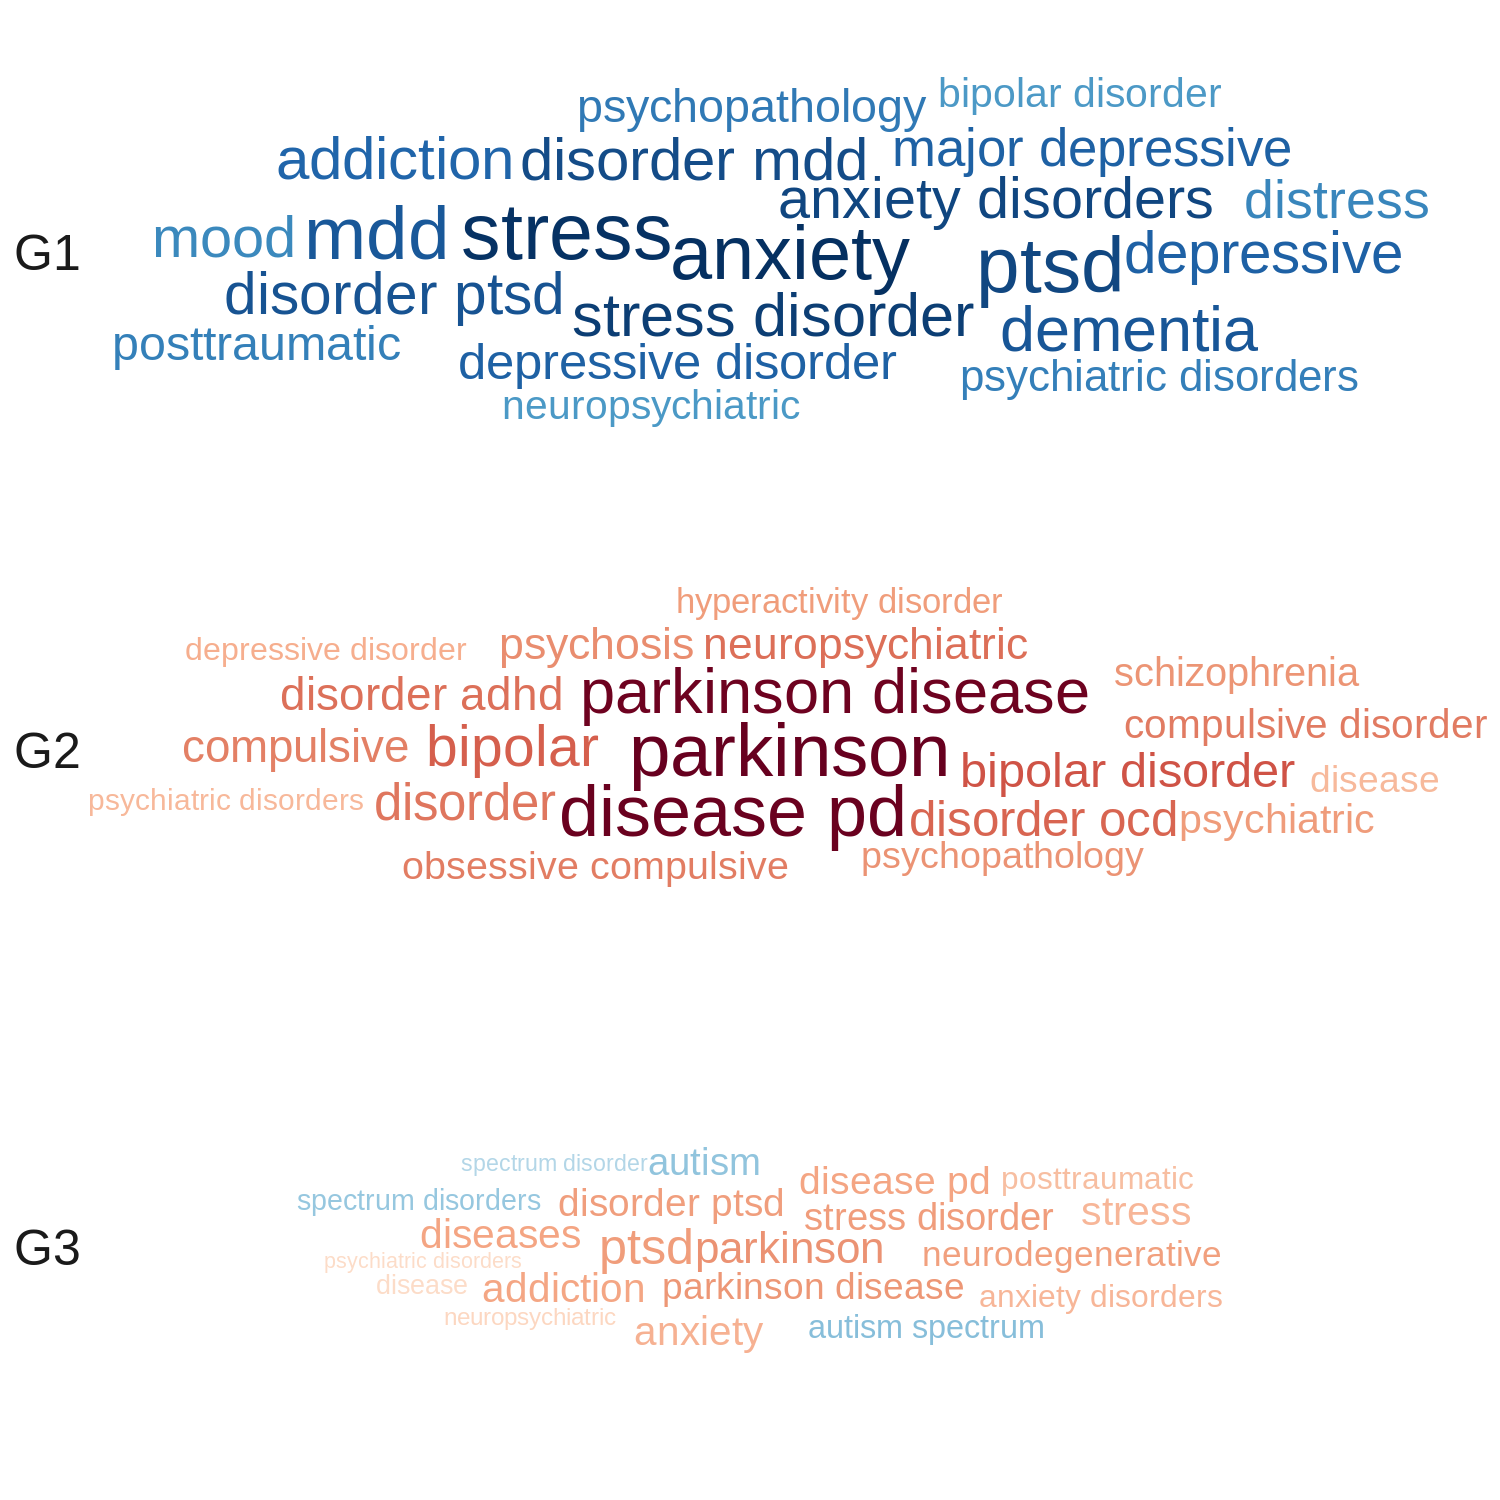

In [265]:
%%R -i ns_corrs -w 15 -h 15 --units in -r 100
ggplot(ns_corrs, aes(label=term, size=abs(corr), color=corr)) +
facet_grid(G~., switch='y') +
geom_text_wordcloud(area_corr=T) +
scale_size_area(max_size = 20) +
scale_color_gradientn(colors=rev(brewer.rdbu(100))) +
guides(color=guide_colorbar()) +
theme_minimal() +
theme(strip.text.y.left=element_text(size=36, angle=0))

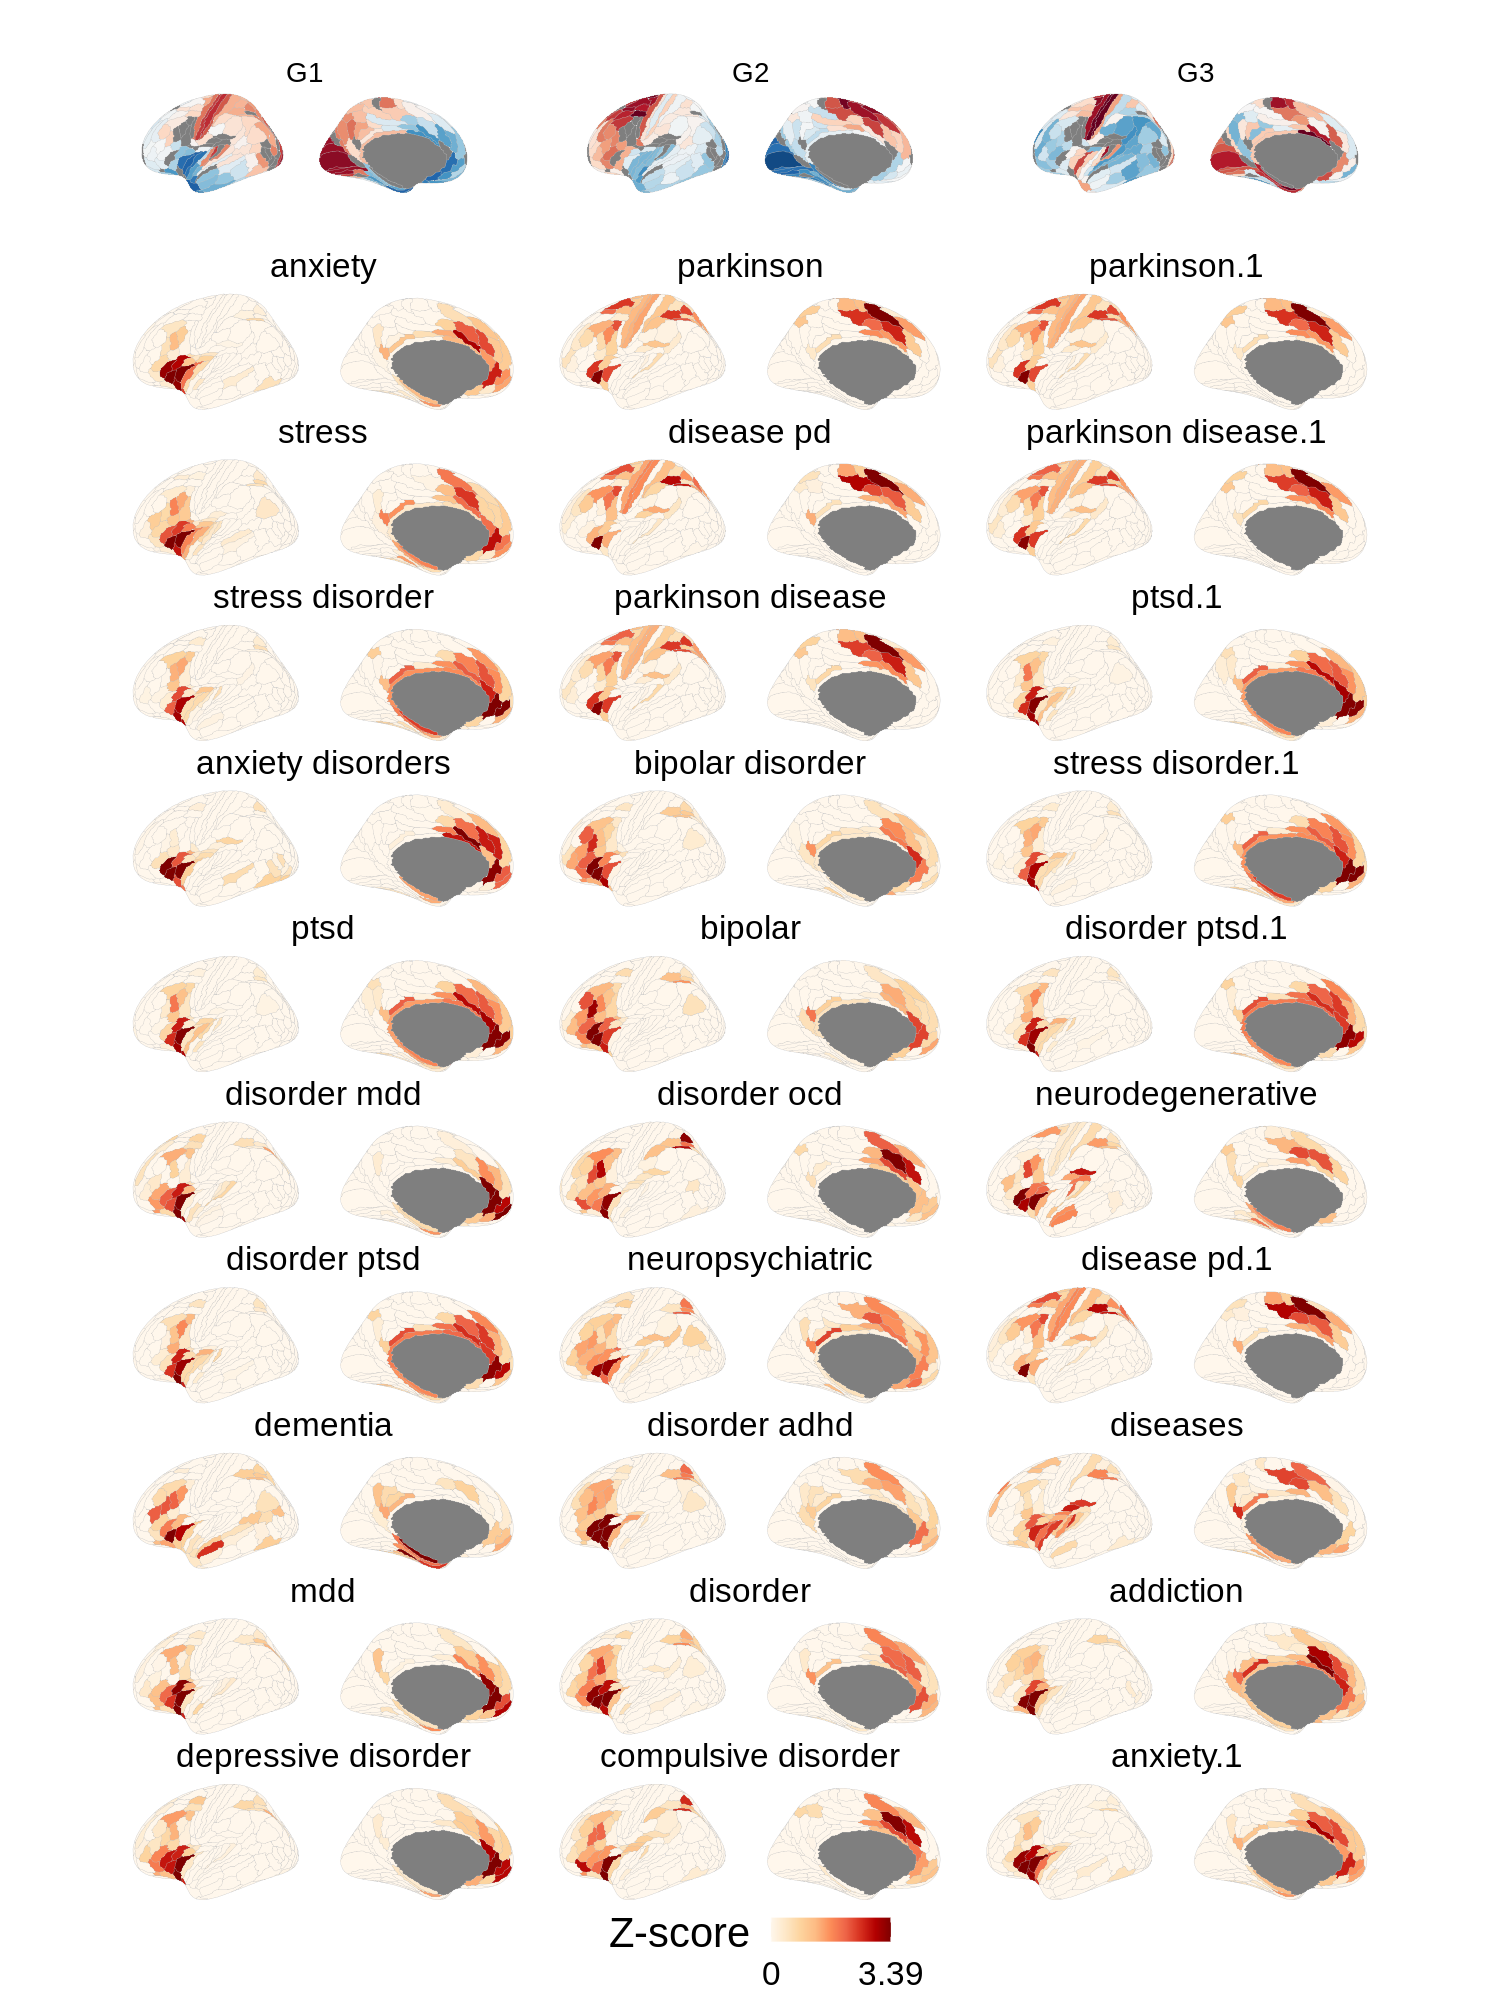

In [266]:
%%R -w 15 -h 20 --units in -r 100 -i ns_maps -i ns_corrs -i hcp_scores
source("../code/plot_maps.R")

selected_terms = list(
    G1 = ns_corrs %>% filter(G=='G1', rank <= 10) %>% .$term,
    G2 = ns_corrs %>% filter(G=='G2', rank <= 10) %>% .$term,
    G3 = ns_corrs %>% filter(G=='G3', rank <= 10) %>% .$term
)
selected_maps = cbind(
    ns_maps %>% select(all_of(selected_terms$G1)),
    ns_maps %>% select(all_of(selected_terms$G2)),
    ns_maps %>% select(all_of(selected_terms$G3))
)

((
(plot_hcp_wide(hcp_scores) + guides(fill=F)) / 
plot_maps(selected_maps, colorscale='zero', colors=brewer.orrd(100))    
) + plot_layout(heights=c(1,14))) & theme(text=element_text(size=30))

### Cognitive concepts only

In [ ]:
ns_maps_raw = get_parcellated_terms(matched_concepts, ns_dset)
# save_pickle(ns_maps_raw, 'ns_maps_raw')

Running meta analysis for 'meaning' (estimator = MKDADensity)
Running meta analysis for 'addiction' (estimator = MKDADensity)
Running meta analysis for 'familiarity' (estimator = MKDADensity)
Running meta analysis for 'knowledge' (estimator = MKDADensity)
Running meta analysis for 'efficiency' (estimator = MKDADensity)
Running meta analysis for 'gaze' (estimator = MKDADensity)
Running meta analysis for 'word recognition' (estimator = MKDADensity)
Running meta analysis for 'eating' (estimator = MKDADensity)
Running meta analysis for 'intention' (estimator = MKDADensity)
Running meta analysis for 'categorization' (estimator = MKDADensity)
Running meta analysis for 'anticipation' (estimator = MKDADensity)
Running meta analysis for 'manipulation' (estimator = MKDADensity)
Running meta analysis for 'competition' (estimator = MKDADensity)
Running meta analysis for 'listening' (estimator = MKDADensity)
Running meta analysis for 'impulsivity' (estimator = MKDADensity)
Running meta analysis for

In [69]:
ns_maps = (ns_maps_raw
    .iloc[:180].set_axis(range(1,181))
    .join(get_labels_hcp()).set_index('label')
    .apply(lambda x: (x-np.mean(x))/np.std(x))
)

In [184]:
version = dm_hcp_3d_ds5
# version = dm_hcp_ds8

ns_corrs = (get_corrs(version.clean_scores(), ns_maps)
    .melt(ignore_index=False).reset_index()
    .set_axis(['term','G','corr'], axis=1)
    .assign(corr_abs = lambda x: x['corr'].abs())
    .assign(rank = lambda x: x.groupby('G')['corr_abs'].rank(ascending=False))
    .loc[lambda x: x['rank'] <= 20]
    .groupby('G', group_keys=False).apply(lambda x: x.sort_values('corr_abs', ascending=False))
)
ns_corrs.head()

term   G      corr  corr_abs  rank
53        fear  G1 -0.482445  0.482445   1.0
96     anxiety  G1 -0.455368  0.455368   2.0
59  extinction  G1 -0.453262  0.453262   3.0
64      stress  G1 -0.451790  0.451790   4.0
7       eating  G1 -0.405335  0.405335   5.0

In [165]:
get_corrs(version.clean_scores(), ns_maps).describe()

G1          G2          G3
count  124.000000  124.000000  124.000000
mean     0.013148    0.188381   -0.019818
std      0.200051    0.145459    0.127076
min     -0.482445   -0.292515   -0.265079
25%     -0.086575    0.110913   -0.093602
50%      0.044071    0.190634   -0.014681
75%      0.146658    0.285703    0.055227
max      0.378346    0.447200    0.272447

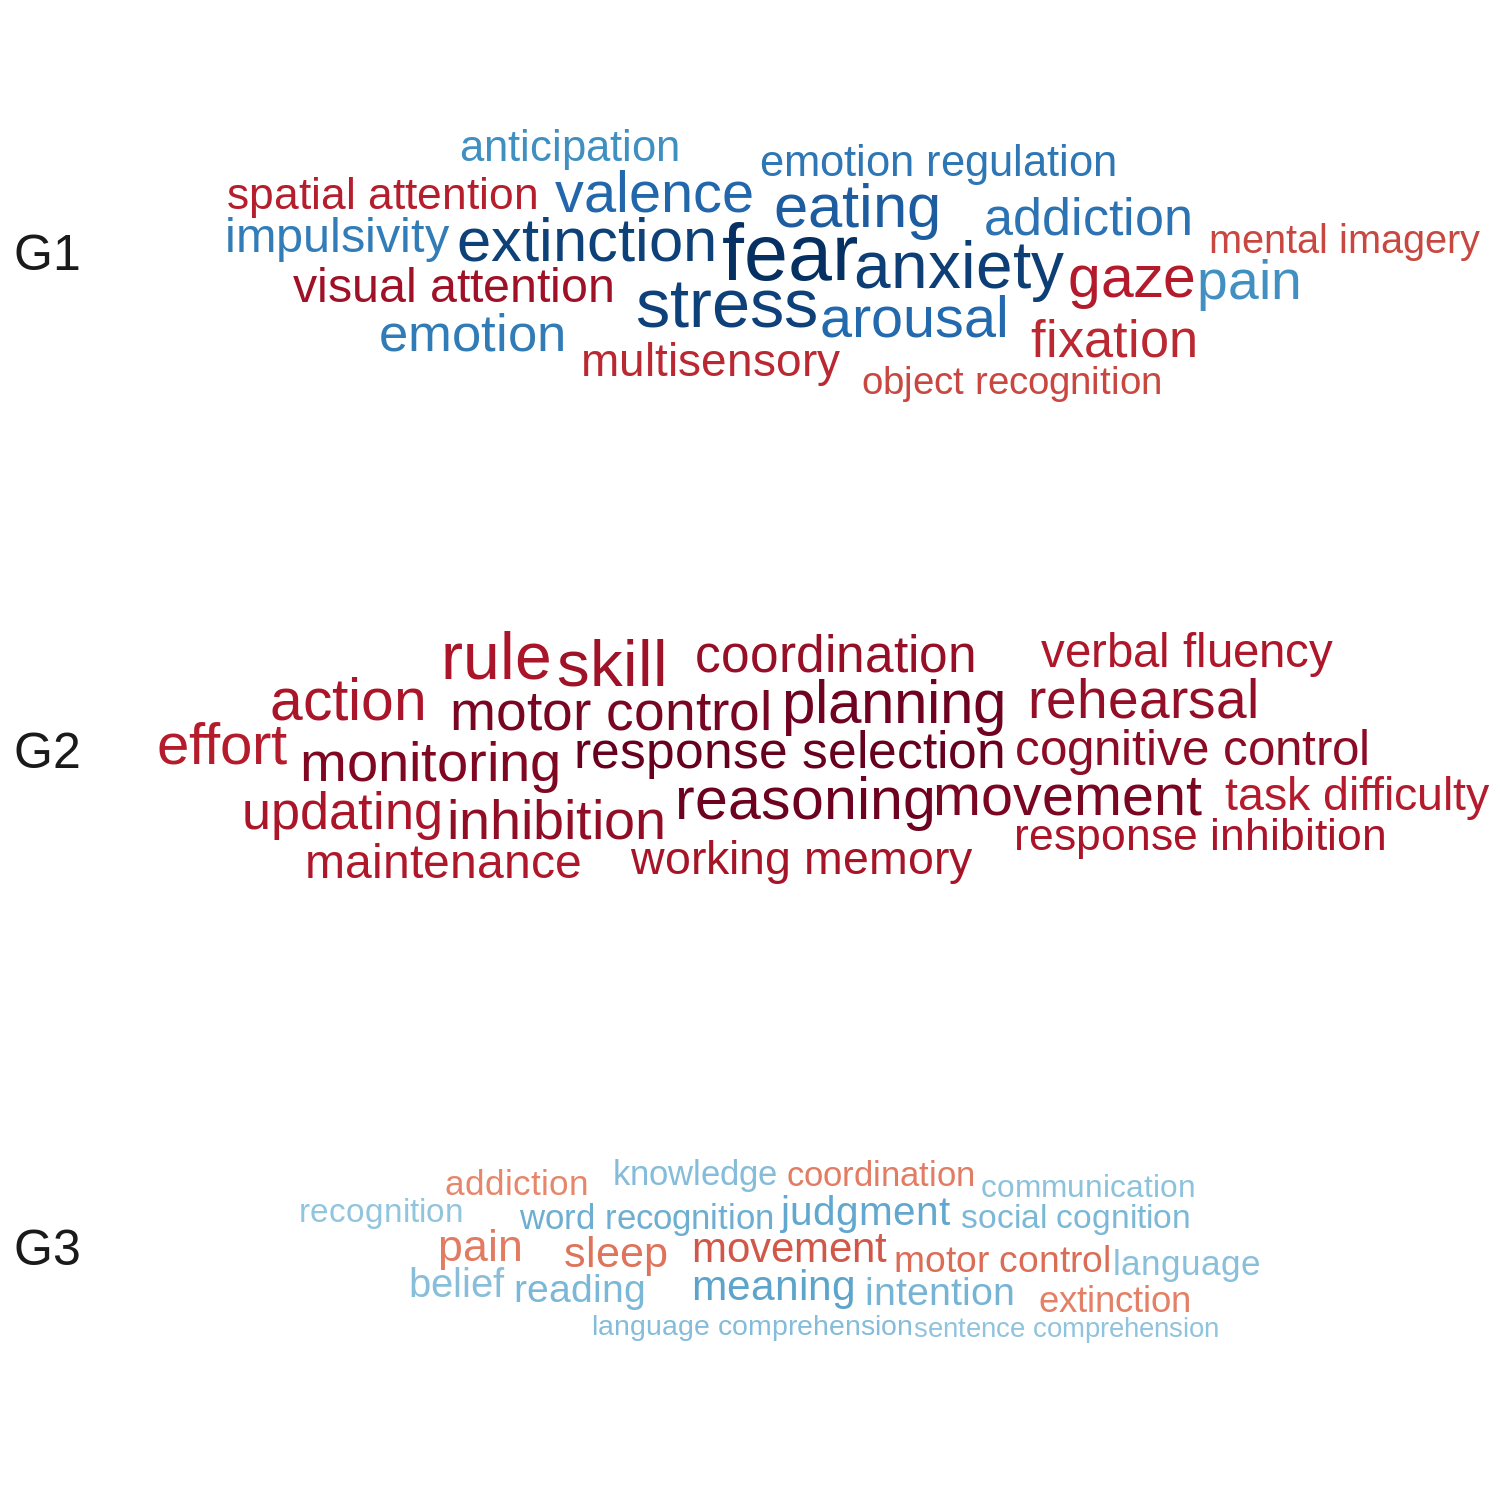

In [204]:
%%R -i ns_corrs -w 15 -h 15 --units in -r 100
ggplot(ns_corrs, aes(label=term, size=abs(corr), color=corr)) +
facet_grid(G~., switch='y') +
geom_text_wordcloud(area_corr=T) +
scale_size_area(max_size = 20) +
scale_color_gradientn(colors=rev(brewer.rdbu(100))) +
guides(color=guide_colorbar()) +
theme_minimal() +
theme(strip.text.y.left=element_text(size=36, angle=0))

In [185]:
ns_corrs.loc[lambda x: x['rank']<=10]

term   G      corr  corr_abs  rank
53                 fear  G1 -0.482445  0.482445   1.0
96              anxiety  G1 -0.455368  0.455368   2.0
59           extinction  G1 -0.453262  0.453262   3.0
64               stress  G1 -0.451790  0.451790   4.0
7                eating  G1 -0.405335  0.405335   5.0
105             valence  G1 -0.386674  0.386674   6.0
119             arousal  G1 -0.381545  0.381545   7.0
88     visual attention  G1  0.378346  0.378346   8.0
1             addiction  G1 -0.361636  0.361636   9.0
34   emotion regulation  G1 -0.353578  0.353578  10.0
218  response selection  G2  0.447200  0.447200   1.0
239           reasoning  G2  0.439768  0.439768   2.0
180            planning  G2  0.436339  0.436339   3.0
179       motor control  G2  0.425084  0.425084   4.0
206            movement  G2  0.423126  0.423126   5.0
246          monitoring  G2  0.417209  0.417209   6.0
193   cognitive control  G2  0.399456  0.399456   7.0
191          inhibition  G2  0.394619  0.394619   8.0
227           rehearsal  G2  0.391812  0.391812   9.0
157        coordination  G2  0.386758  0.386758  10.0
330            movement  G3  0.272447  0.272447   1.0
248             meaning  G3 -0.265079  0.265079   2.0
299            judgment  G3 -0.258911  0.258911   3.0
254    word recognition  G3 -0.246670  0.246670   4.0
303       motor control  G3  0.245195  0.245195   5.0
291               sleep  G3  0.234566  0.234566   6.0
256           intention  G3 -0.234300  0.234300   7.0
278    social cognition  G3 -0.229811  0.229811   8.0
332             reading  G3 -0.229772  0.229772   9.0
329                pain  G3  0.224867  0.224867  10.0

In [157]:
hcp_scores = dm_hcp_3d_ds5.clean_scores()

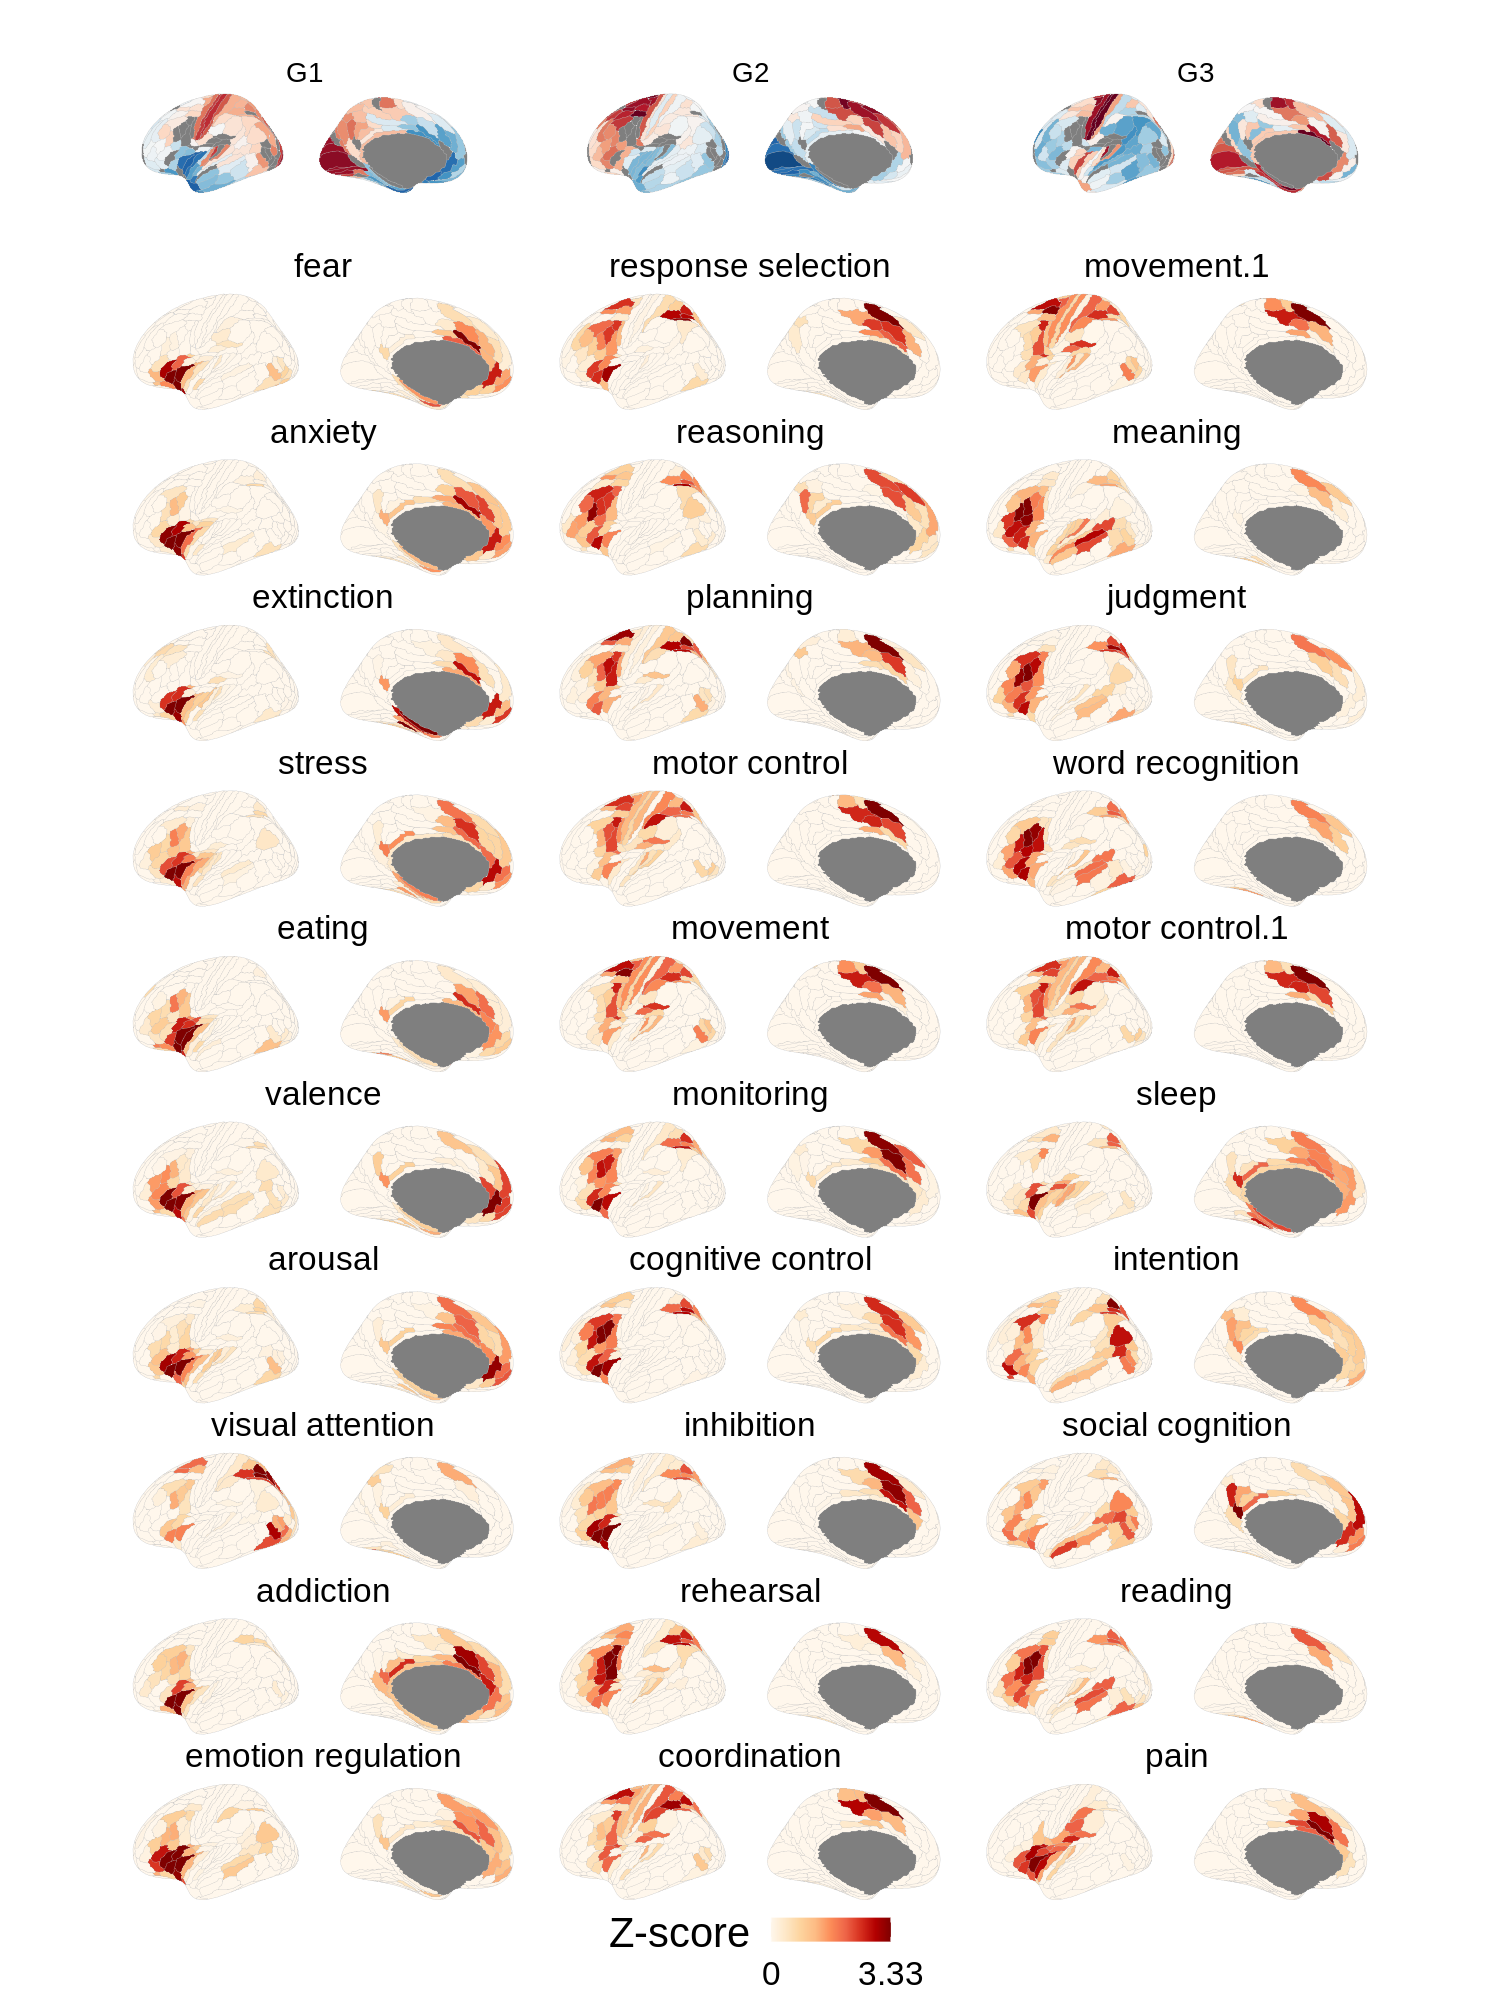

In [199]:
%%R -w 15 -h 20 --units in -r 100 -i ns_maps -i ns_corrs -i hcp_scores
source("../code/plot_maps.R")

selected_terms = list(
    G1 = ns_corrs %>% filter(G=='G1', rank <= 10) %>% .$term,
    G2 = ns_corrs %>% filter(G=='G2', rank <= 10) %>% .$term,
    G3 = ns_corrs %>% filter(G=='G3', rank <= 10) %>% .$term
)
selected_maps = cbind(
    ns_maps %>% select(all_of(selected_terms$G1)),
    ns_maps %>% select(all_of(selected_terms$G2)),
    ns_maps %>% select(all_of(selected_terms$G3))
)

((
(plot_hcp_wide(hcp_scores) + guides(fill=F)) / 
plot_maps(selected_maps, colorscale='zero', colors=brewer.orrd(100))    
) + plot_layout(heights=c(1,14))) & theme(text=element_text(size=30))

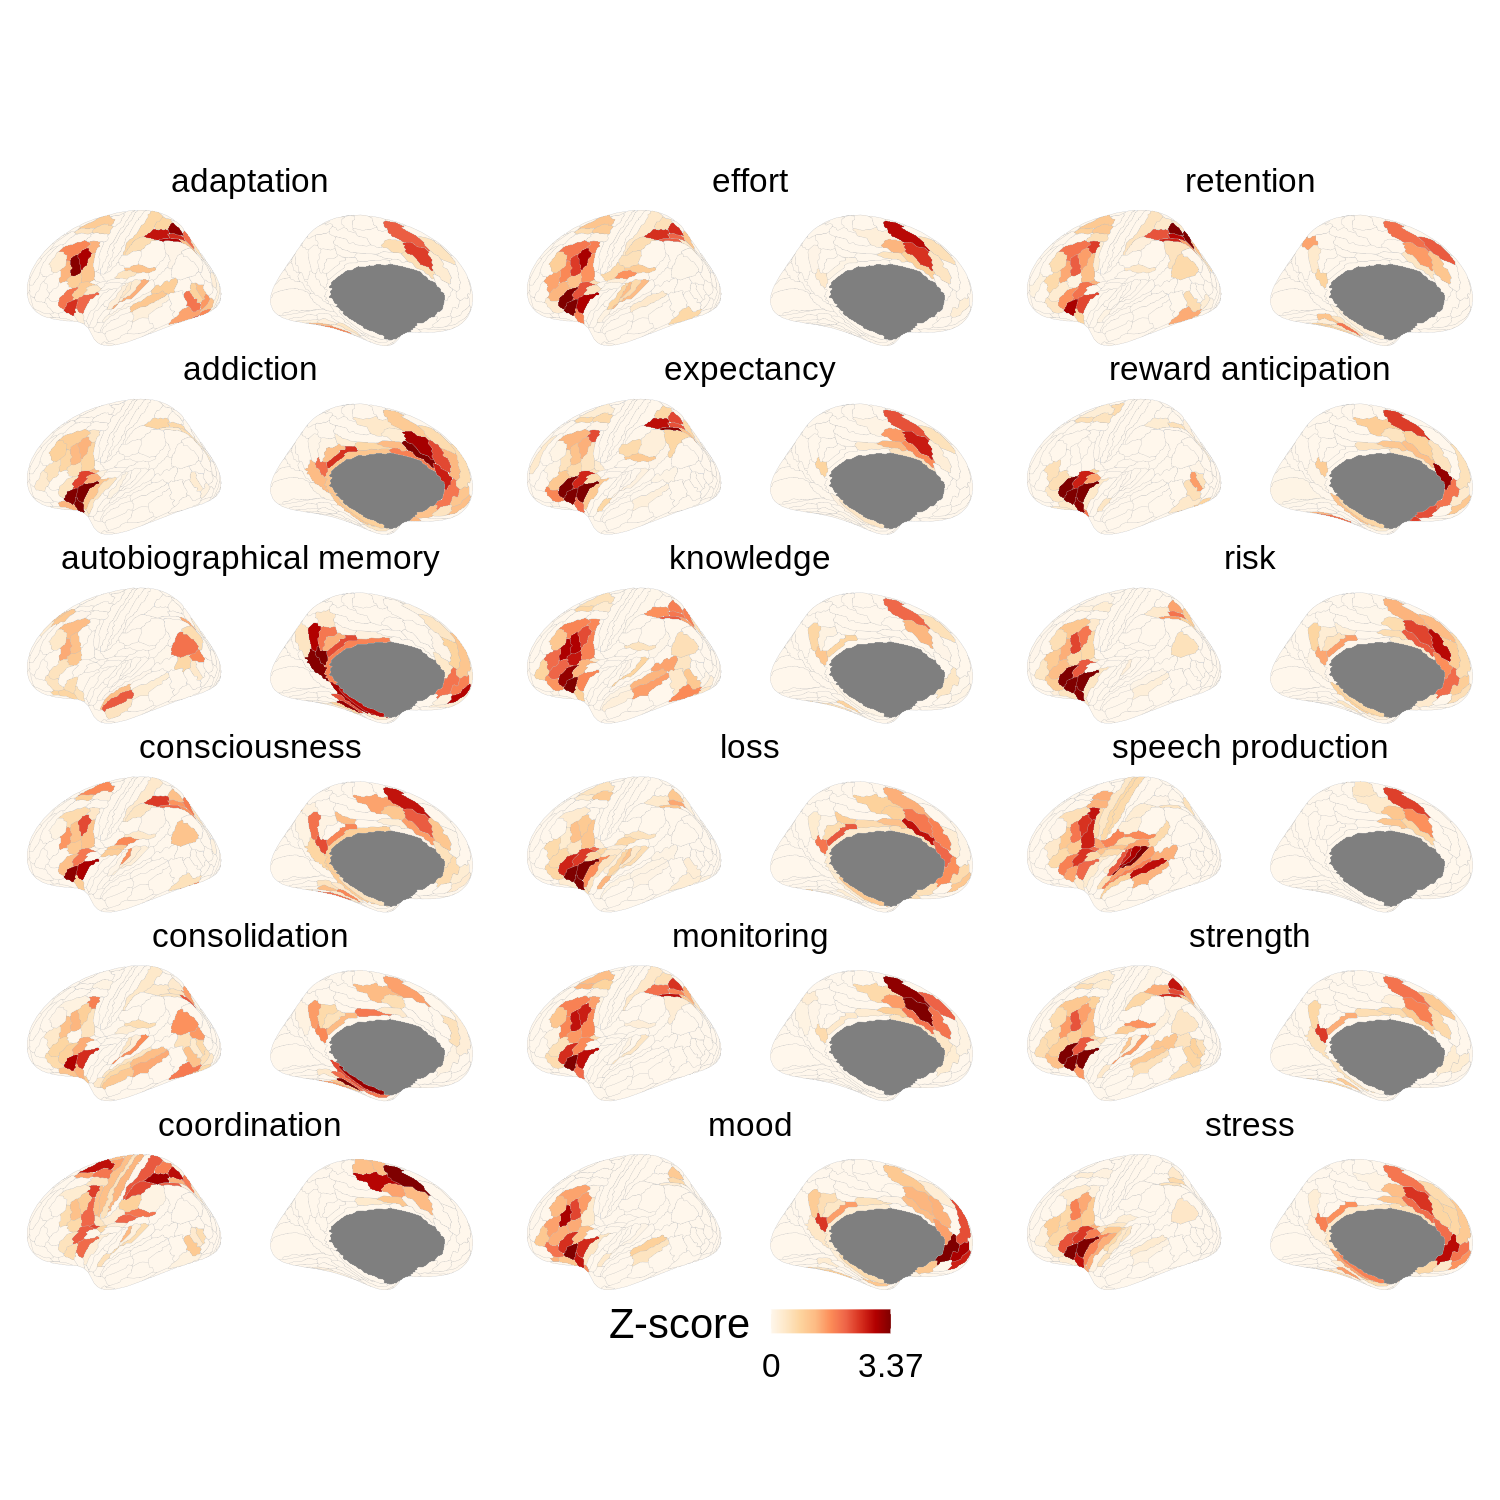

In [210]:
%%R -w 15 -h 15 --units in -r 100 -i ns_maps -i ns_corrs -i hcp_scores
source("../code/plot_maps.R")
random_ints = sample(seq(1,dim(ns_maps)[2], seed=3), size=18)
random_maps = ns_maps[,random_ints] %>% select(order(colnames(.)))
# random_maps = ns_maps %>% 
#     select(c('anxiety','hyperactivity','mood','psychosis','working memory','impulsivity',
#              'intention', 'distraction','association','attention','learning','fear',
#              'emotion','eating','reasoning','stress','empathy','decision making'
# )) %>% select(order(colnames(.)))

plot_maps(random_maps, colorscale='zero', colors=brewer.orrd(100)) + theme(text=element_text(size=30))

# Legacy testing

In [32]:
from nimare.extract import fetch_neurosynth
neurosynth_db = fetch_neurosynth(data_dir='../data/neurosynth-data', source='abstract', vocab='terms')[0]

INFO:nimare.extract.utils:Dataset found in ../data/neurosynth-data/neurosynth

INFO:nimare.extract.extract:Searching for any feature files matching the following criteria: [('source-abstract', 'vocab-terms', 'data-neurosynth', 'version-7')]


File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.
File exists and overwrite is False. Skipping.


In [92]:
concepts = get_cogatlas_concepts()

{'abductive reasoning',
 'abstract analogy',
 'abstract knowledge',
 'acoustic coding',
 'acoustic encoding',
 'acoustic phonetic processing',
 'acoustic processing',
 'action',
 'action initiation',
 'action perception',
 'action-outcome learning',
 'activation',
 'activation level',
 'active maintenance',
 'active recall',
 'active retrieval',
 'acuity',
 'adaptation',
 'adaptive control',
 'addiction',
 'affect perception',
 'affect recognition',
 'agency',
 'agreeableness',
 'altruism',
 'altruistic motivation',
 'alveolar',
 'amodal representation',
 'anaesthetised unresponsive',
 'analog representation',
 'analogical encoding',
 'analogical inference',
 'analogical problem solving',
 'analogical reasoning',
 'analogical transfer',
 'analogy',
 'anchoring',
 'anhedonia',
 'animacy decision',
 'animacy perception',
 'anticipation',
 'antisocial personality',
 'anxiety',
 'apparent motion',
 'apperception',
 'appetite',
 'appetitive motivation',
 'arithmetic processing',
 'arousal',

In [121]:
import re
all_labels = ns_dset.get_labels()
all_terms = [label.replace('terms_abstract_tfidf__', '') for label in all_labels]
concepts.intersection(all_terms)

{'inhibition', 'response selection', 'monitoring', 'focus', 'insight', 'maintenance', 'balance', 'movement', 'emotion', 'fear', 'imagery', 'decision making', 'mood', 'autobiographical memory', 'association', 'selective attention', 'language comprehension', 'verbal fluency', 'action', 'consolidation', 'memory retrieval', 'reading', 'strategy', 'speech production', 'sustained attention', 'concept', 'updating', 'episodic memory', 'visual attention', 'detection', 'cognitive control', 'dyslexia', 'integration', 'morphology', 'knowledge', 'priming', 'object recognition', 'adaptation', 'extinction', 'planning', 'encoding', 'semantic memory', 'gaze', 'intelligence', 'competition', 'spatial attention', 'reasoning', 'familiarity', 'loss', 'hyperactivity', 'eating', 'goal', 'mental imagery', 'learning', 'listening', 'arousal', 'judgment', 'efficiency', 'sentence comprehension', 'belief', 'speech perception', 'pain', 'rehearsal', 'rhythm', 'navigation', 'memory', 'anticipation', 'face recognition'

In [112]:
pprint(neurosynth_db)

Pretty printing has been turned OFF


In [33]:
from nimare.io import convert_neurosynth_to_dataset
neurosynth_dset = convert_neurosynth_to_dataset(
    coordinates_file=neurosynth_db["coordinates"],
    metadata_file=neurosynth_db["metadata"],
    annotations_files=neurosynth_db["features"],
)


In [56]:
neurosynth_dset.save("../outputs/neurosynth_dset.pkl")

In [11]:
from nimare.dataset import Dataset
neurosynth_dset = Dataset.load("../outputs/neurosynth_dset.pkl")

In [25]:
ns_dset = neurosynth_dset.slice(neurosynth_dset.ids[:])

In [26]:
ns_dset

Dataset(14371 experiments, space='mni152_2mm')

In [78]:
from nimare import dataset, meta
meta_estimator = meta.cbma.mkda.MKDADensity()
label_positive_ids = ns_dset.get_studies_by_label("terms_abstract_tfidf__attentional_state", 0.05)
label_negative_ids = list(set(ns_dset.ids) - set(label_positive_ids))

label_positive_dset = ns_dset.slice(label_positive_ids)
label_negative_dset = ns_dset.slice(label_negative_ids)
len(label_positive_ids)
# meta_result = meta_estimator.fit(label_positive_dset, label_negative_dset)


ValueError: Missing label(s): terms_abstract_tfidf__attentional_state

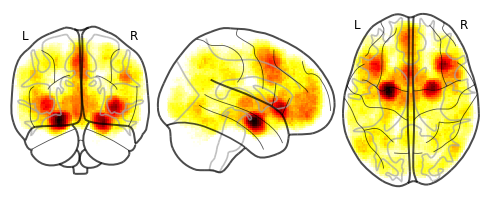

In [42]:
from nilearn.plotting import * 
zmap = meta_result.get_map('z') #.get_map('z_desc-specificity')
plot_glass_brain(zmap)

In [46]:
import nibabel as nib
from nilearn.maskers import NiftiLabelsMasker
hcp_img = nib.load("../data/parcellations/HCP-MMP_1mm.nii.gz")
transformed = NiftiLabelsMasker(hcp_img).fit_transform(zmap)

In [68]:
testmap = get_labels_hcp().to_frame().assign(map = transformed.squeeze()).set_index('label').iloc[:180]

map
label          
V1     0.187505
MST    1.492783
V6     0.015485
V2     0.242578
V3     0.320932
...         ...
STSva  0.484869
TE1m   0.029679
PI     0.623738
a32pr  2.229685
p24    3.501449

[180 rows x 1 columns]

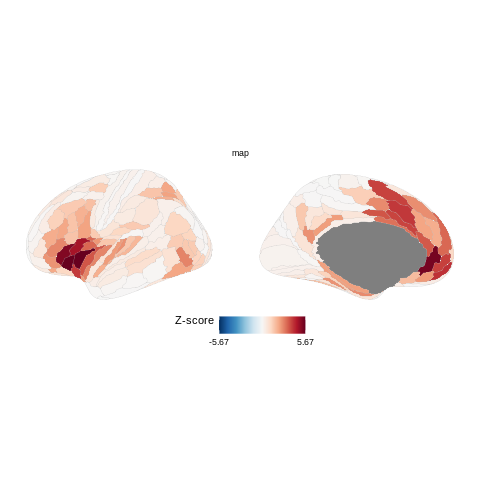

In [69]:
%%R -i testmap
plot_maps(testmap)

In [40]:
ns_dset = neurosynth_dset.slice(neurosynth_dset.ids[:500])
label_ids = ns_dset.get_studies_by_label("terms_abstract_tfidf__arousal", label_threshold=0.001)
print(f"There are {len(label_ids)} studies in the Dataset with the 'Neurosynth_TFIDF__amygdala' label.")

There are 8 studies in the Dataset with the 'Neurosynth_TFIDF__amygdala' label.


In [43]:
import nimare

In [44]:
decoder = nimare.decode.discrete.NeurosynthDecoder(correction=None)
decoder.fit(ns_dset)
decoded_df = decoder.transform(ids=label_ids)
decoded_df.sort_values(by="probReverse", ascending=False).head(10)

INFO:nimare.decode.base:Retaining 2941/(3228 features.


pForward   zForward  probForward  \
Term                                                                           
terms_abstract_tfidf__arousal           3.473620e-77  18.595820     0.500000   
terms_abstract_tfidf__clips             3.334076e-02   2.127956     0.507014   
terms_abstract_tfidf__self report       3.334076e-02   2.127956     0.507014   
terms_abstract_tfidf__smokers           3.334076e-02   2.127956     0.507014   
terms_abstract_tfidf__negative neutral  3.334076e-02   2.127956     0.507014   
terms_abstract_tfidf__vlpfc             3.334076e-02   2.127956     0.507014   
terms_abstract_tfidf__diminished        3.334076e-02   2.127956     0.507014   
terms_abstract_tfidf__fluctuations      3.334076e-02   2.127956     0.507014   
terms_abstract_tfidf__regulate          3.334076e-02   2.127956     0.507014   
terms_abstract_tfidf__amygdala insula   3.334076e-02   2.127956     0.507014   

                                             pReverse   zReverse  probReverse  
Term                                                                           
terms_abstract_tfidf__arousal           9.505398e-111  22.360680     1.000000  
terms_abstract_tfidf__clips              4.158796e-15   7.850048     0.986166  
terms_abstract_tfidf__self report        4.158796e-15   7.850048     0.986166  
terms_abstract_tfidf__smokers            4.158796e-15   7.850048     0.986166  
terms_abstract_tfidf__negative neutral   4.158796e-15   7.850048     0.986166  
terms_abstract_tfidf__vlpfc              4.158796e-15   7.850048     0.986166  
terms_abstract_tfidf__diminished         4.158796e-15   7.850048     0.986166  
terms_abstract_tfidf__fluctuations       4.158796e-15   7.850048     0.986166  
terms_abstract_tfidf__regulate           4.158796e-15   7.850048     0.986166  
terms_abstract_tfidf__amygdala insula    4.158796e-15   7.850048     0.986166

In [41]:
from fetch_and_parcellate_neurosynth import get_cogatlas_concepts
concepts = get_cogatlas_concepts()
len(concepts)

KeyboardInterrupt: 

In [12]:
import numpy as np
import pandas as pd
from scipy import sparse
data_dir = "../data/neurosynth-data/neurosynth/"
feature_data_sparse = sparse.load_npz(data_dir + "data-neurosynth_version-7_vocab-terms_source-abstract_type-tfidf_features.npz")
feature_data = feature_data_sparse.todense()
metadata_df = pd.read_table(data_dir + "data-neurosynth_version-7_metadata.tsv.gz")
ids = metadata_df["id"].tolist()
feature_names = np.genfromtxt(data_dir + "data-neurosynth_version-7_vocab-terms_vocabulary.txt", dtype=str, delimiter="\t").tolist()

feature_df = pd.DataFrame(index=ids, columns=feature_names, data=feature_data)

In [10]:
%run ../code/fetch_and_parcellate_neurosynth.py

HTTPError: HTTP Error 404: Not Found

## Use Justine's compiled version?

Wrong parcellation ... sigh

In [52]:
from pymatreader import read_mat
from scipy.io import loadmat

In [65]:
terms = [x[0] for x in loadmat('../data/neurosynth/terms.mat')['terms'][0][0][2][0]]

In [68]:
loadmat('../data/neurosynth/neurosynth.mat')['cogact125']

(234, 123)

## Try to use neurosynth directly...

Try to parcellate neurosynth

In [98]:
dict(np.load('../data/neurosynth/data-neurosynth_version-7_vocab-terms_source-abstract_type-tfidf_features.npz'))

{'indices': array([   23,   249,   338, ..., 13509, 13991, 14053], dtype=int32),
 'indptr': array([      0,     147,     288, ..., 1049122, 1049225, 1049299],
       dtype=int32),
 'format': array(b'csc', dtype='|S3'),
 'shape': array([14371,  3228]),
 'data': array([0.05539422, 0.09387571, 0.06899317, ..., 0.38408549, 0.09388443,
        0.10071574])}

In [103]:
pd.read_csv('../data/neurosynth/data-neurosynth_version-7_vocab-terms_vocabulary.txt', header=None)

0
0                001
1                 01
2                 05
3                 10
4                100
...              ...
3223     young older
3224         younger
3225  younger adults
3226           youth
3227            zone

[3228 rows x 1 columns]

In [92]:
pd.read_csv('../data/neurosynth/data-neurosynth_version-7_coordinates.tsv', sep='\t')

id  table_id table_num  peak_id     x     y     z
0        9065511     28698        1.   548691  38.0 -48.0  49.0
1        9065511     28698        1.   548699  52.0 -62.0  14.0
2        9065511     28698        1.   548698 -25.0 -45.0  -2.0
3        9065511     28698        1.   548697  25.0 -35.0  -8.0
4        9065511     28698        1.   548696  42.0 -47.0 -19.0
...          ...       ...       ...      ...   ...   ...   ...
507886  29845006     35711        05   686520  27.0  50.0  23.0
507887  29845006     35711        05   686519 -28.0  51.0  15.0
507888  29845006     35711        05   686535  10.0 -69.0  39.0
507889  29845006     35711        05   686526  36.0  16.0   4.0
507890  29845006     35711        05   686536   0.0 -29.0  30.0

[507891 rows x 7 columns]

In [87]:
import gzip
import pickle

with gzip.open('../data/neurosynth/neurosynth_dataset.pkl.gz', 'rb') as f:
    ns = pickle.load(f)

In [77]:
ns

Dataset(14371 experiments, space='mni152_2mm')

Put gradients into vertices

In [71]:
from nilearn.input_data import NiftiLabelsMasker

In [20]:
hcp_img_mni = nib.load("../data/parcellations/HCPMMP1_on_MNI152_ICBM2009a_nlin.nii.gz")

In [9]:
g1 = dm_hcp_ds9.scores[0].reindex(range(1,181)).values

In [ ]:
from neuromaps.nulls.spins import parcels_to_vertices
parcels_to_vertices(img, g1)

In [21]:
data = np.atleast_2d(g1)
img = NiftiLabelsMasker(hcp_img_mni).fit().inverse_transform(data)

In [30]:
nib.save(img, "../outputs/test.nii.gz")

Use nimare to get neurosynth files

In [35]:
import os
from pprint import pprint

from nimare.extract import download_abstracts, fetch_neuroquery, fetch_neurosynth
from nimare.io import convert_neurosynth_to_dataset

In [36]:
out_dir = os.path.abspath("../data")
os.makedirs(out_dir, exist_ok=True)

files = fetch_neurosynth(
    data_dir=out_dir,
    version="7",
    overwrite=False,
    source="abstract",
    vocab="terms",
)
# Note that the files are saved to a new folder within "out_dir" named "neurosynth".
pprint(files)
neurosynth_db = files[0]

[{'coordinates': '/home/rajd2/AHBA/data/neurosynth/data-neurosynth_version-7_coordinates.tsv.gz',
  'features': [{'features': '/home/rajd2/AHBA/data/neurosynth/data-neurosynth_version-7_vocab-terms_source-abstract_type-tfidf_features.npz',
                'vocabulary': '/home/rajd2/AHBA/data/neurosynth/data-neurosynth_version-7_vocab-terms_vocabulary.txt'}],
  'metadata': '/home/rajd2/AHBA/data/neurosynth/data-neurosynth_version-7_metadata.tsv.gz'}]


In [45]:
neurosynth_dset = convert_neurosynth_to_dataset(
    coordinates_file=neurosynth_db["coordinates"],
    metadata_file=neurosynth_db["metadata"],
    annotations_files=neurosynth_db["features"],
)
neurosynth_dset.save(os.path.join(out_dir, "neurosynth_dataset.pkl.gz"))
print(neurosynth_dset)

Dataset(14371 experiments, space='mni152_2mm')


In [47]:
from neurosynth import Dataset, meta, decode, network

In [48]:
neurosynth_dset.get_feature_names()

AttributeError: 'Dataset' object has no attribute 'get_feature_names'